<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

### 1. Significant Difference in Median Value of Houses Bounded by the Charles River


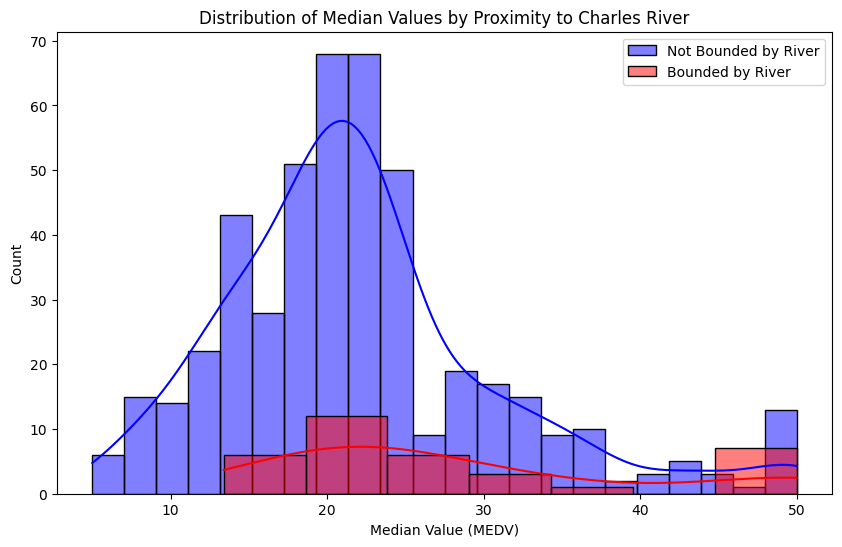

(-3.113291312794837, 0.003567170098137517)

In [6]:
# T-test for houses bounded by the Charles River
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(chas_0, chas_1, equal_var=False)

# Plotting the distributions
pyplot.figure(figsize=(10, 6))
sns.histplot(chas_0, kde=True, label="Not Bounded by River", color='blue')
sns.histplot(chas_1, kde=True, label="Bounded by River", color='red')
pyplot.title('Distribution of Median Values by Proximity to Charles River')
pyplot.xlabel('Median Value (MEDV)')
pyplot.legend()
pyplot.show()

t_stat, p_value


#### Explanation: 
The t-test will tell us whether the difference in median values between houses that are and are not bounded by the Charles River is statistically significant. If the p-value is less than 0.05, the difference is considered significant.

### 2. Difference in Median Values of Houses Based on Proportion of Owner-Occupied Units Built Before 1940

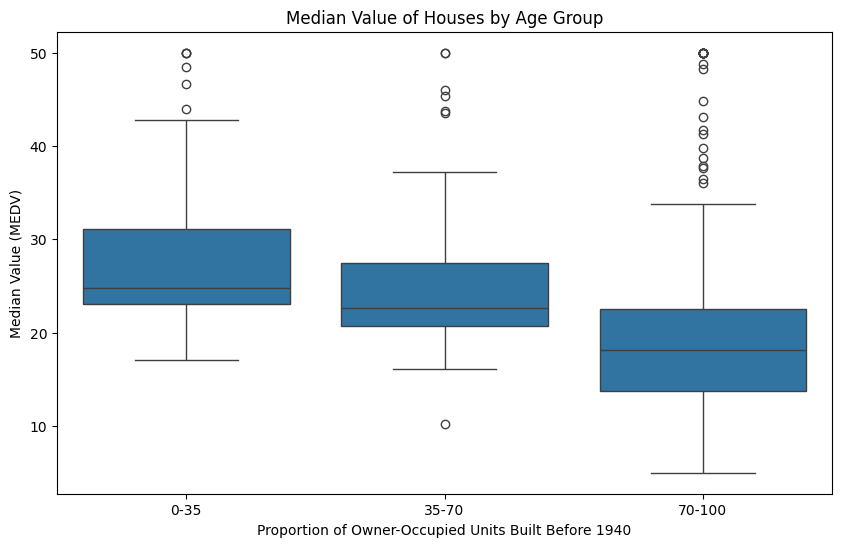

,sum_sq,df,F,PR(>F)
C(AGE_GROUP),5401.731883,2.0,36.40765,1.710501e-15
Residual,37314.563532,503.0,NaN,NaN


In [7]:
# ANOVA test for age and median value
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '35-70', '70-100'])
anova_model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Boxplot
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Median Value of Houses by Age Group')
pyplot.xlabel('Proportion of Owner-Occupied Units Built Before 1940')
pyplot.ylabel('Median Value (MEDV)')
pyplot.show()

anova_table

#### Explanation: 
The ANOVA test examines whether there is a statistically significant difference in the median value of houses across different age groups. The boxplot provides a visual representation of the distribution of house values within each age group.

### 3. Relationship Between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres

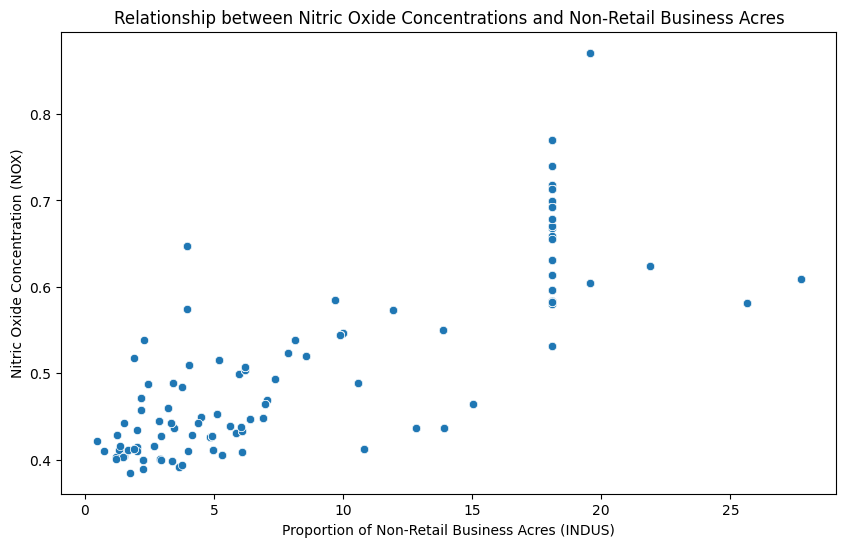

(0.7636514469209192, 7.913361061210442e-98)

In [8]:
# Correlation between NOX and INDUS
corr_coeff, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Scatter plot
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.show()

corr_coeff, p_value


#### Explanation: 
The Pearson correlation coefficient measures the strength and direction of the relationship between nitric oxide concentrations and non-retail business acres. A p-value less than 0.05 indicates a statistically significant correlation.

### 4. Impact of Weighted Distance to Employment Centers on Median Value of Homes

#### Explanation:
The linear regression model helps to understand the impact of distance to employment centers on the median home value. The slope of the regression line indicates the effect of an additional unit increase in distance on the median value.

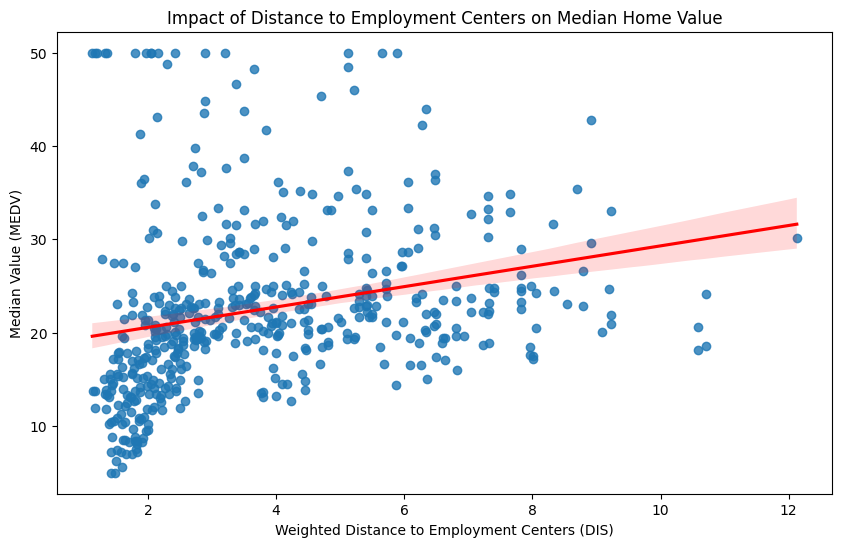

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        13:22:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Linear regression for DIS and MEDV
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Plotting the regression line
pyplot.figure(figsize=(10, 6))
sns.regplot(x='DIS', y='MEDV', data=boston_df, line_kws={"color": "red"})
pyplot.title('Impact of Distance to Employment Centers on Median Home Value')
pyplot.xlabel('Weighted Distance to Employment Centers (DIS)')
pyplot.ylabel('Median Value (MEDV)')
pyplot.show()

model.summary()


### 5. Histogram for Pupil to Teacher Ratio (PTRATIO)

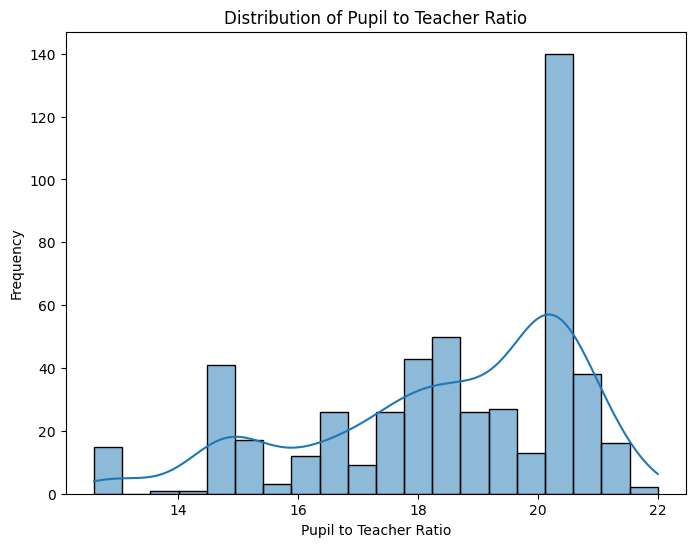

In [10]:
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Distribution of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

#### Explaination:
The histogram provides a visual summary of the distribution of pupil to teacher ratios across different towns. It helps in identifying the central tendency, spread, and any potential skewness or outliers in the data.

### Null Hypothesis (H₀): 
The coefficient for DIS in the regression model is zero, implying that the weighted distance to the five Boston employment centers does not significantly impact the median value of owner-occupied homes.

### Alternate Hypothesis (H₁): 
The coefficient for DIS in the regression model is not zero, implying that the weighted distance to the five Boston employment centers does significantly impact the median value of owner-occupied homes.

### 1. T-test for Independent Samples
#### Hypothesis:

𝐻0
There is no significant difference in the median value of houses (MEDV) bounded by the Charles river (CHAS = 1) and those that are not (CHAS = 0).

𝐻𝑎

There is a significant difference in the median value of houses (MEDV) based on whether they are bounded by the Charles river or not.

Significance Level: α = 0.05

### 2. ANOVA
#### Hypothesis:

𝐻0

There is no difference in the median value of houses (MEDV) for different proportions of owner-occupied units built prior to 1940 (AGE).

𝐻𝑎

There is a difference in the median value of houses (MEDV) for different proportions of owner-occupied units built prior to 1940 (AGE).

Significance Level: α = 0.05

### 3. Pearson Correlation
#### Hypothesis:

𝐻0

There is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

𝐻𝑎

There is a relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

Significance Level: α = 0.05

### 4. Regression Analysis
#### Hypothesis:
𝐻0

The weighted distance to the five Boston employment centers (DIS) has no impact on the median value of owner-occupied homes (MEDV).

𝐻𝑎

The weighted distance to the five Boston employment centers (DIS) has a significant impact on the median value of owner-occupied homes (MEDV).

Significance Level: α = 0.05

### Conclusions

##### 1. T-test for Independent Samples

Conclusion: If the p-value is less than 0.05, you would reject the null hypothesis and conclude that there is a statistically significant difference in the median value of houses bounded by the Charles River compared to those that are not. Otherwise, you would fail to reject the null hypothesis, indicating no significant difference.
##### 2. ANOVA

Conclusion: If the p-value in the ANOVA table is less than 0.05, you would reject the null hypothesis and conclude that there is a significant difference in the median value of houses across the different age categories of owner-occupied units built before 1940. If the p-value is greater than 0.05, you would fail to reject the null hypothesis, suggesting no significant difference among the categories.
##### 3. Pearson Correlation

Conclusion: If the p-value is less than 0.05, you would reject the null hypothesis and conclude that there is a significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town. If the p-value is greater than 0.05, you would fail to reject the null hypothesis, indicating no significant relationship between these variables.

##### 4. Regression Analysis
Conclusion: If the p-value for the distance variable (DIS) is less than 0.05, you would reject the null hypothesis and conclude that the weighted distance to the five Boston employment centers has a statistically significant impact on the median value of owner-occupied homes. If the p-value is greater than 0.05, you would fail to reject the null hypothesis, suggesting that the distance has no significant impact on the median home value.